# **FINAL PROJECT - H team**

<img src="https://www.charlessaliba.com/wp-content/uploads/2020/09/319718852-corona-1532x900-adobestock-1.jpg" 
width="400"/>


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [9]:
url = 'https://raw.githubusercontent.com/TehilaM1/DataScience/main/Effects%20on%20personality%20due%20to%20Covid-19%20(Responses)%20-%20Form%20Responses%201.csv'
corona_effects = pd.read_csv(url)

In [10]:
corona_effects.head()

,Timestamp,Enter your name,Enter gender,You are a-,1. Average number of hours you used to sleep before covid-,2. Average number of hours you sleep now-,3. Are you overeating or have put on your weight?,"4. Number of hours you used mobile, tv, laptop or any other devices before covid-",5. Number of hours you use these devices now-,6. Do you exercise daily?,"7. Health issues like anxiety, headache, dehydration, stomach ache or any other problems have started or increased than before",8. Relations with family have improved?,9. Contact with old school friends or fellow mates have increased and social life have improved after covid,10. Are you working on your skills and hobbies and trying to enhance them?,11. Have you kept studies aside and just enjoying this phase like a long vacation?,12. Are you going out frequently just with a mask on?,13. Are you taking proper preventive measures and sanitizing everything you use(including eatables and clothes)?,14. Overall covid has changed you in which manner?
0,8/27/2020 20:42:45,Sourabh Karma,Male,college student,8,6,NO,3,10.0,Yes,No,Same as before,Same as before,Yes,Yes,Yes,Yes,Positive
1,8/31/2020 13:59:59,Suyash Tabakade,Male,college student,6,9,No,6,10.0,Sometimes,No,Same as before,Yes,Yes,Yes,No,Yes,Negative
2,8/31/2020 14:00:32,Khushi Neema,Female,college student,7,9,No,6,7.0,Sometimes,Yes,yes,Yes,Yes,No,No,Yes,Positive
3,8/31/2020 14:01:17,Divyansh Verma,Male,college student,2,7,No,14,4.0,Yes,Same as before,no,No,Yes,No,No,Yes,Not at all changed
4,8/31/2020 14:02:47,Mayank Pandya,Male,college student,6,8,No,2,7.0,Sometimes,No,Same as before,Same as before,Yes,No,Yes,Yes,Negative


### **1. Checking missing values and data types:**

In [11]:
corona_effects.dtypes

Timestamp                                                                                                                          object
Enter your name                                                                                                                    object
Enter gender                                                                                                                       object
You  are a-                                                                                                                        object
1. Average number of hours you used to sleep before covid-                                                                         object
2. Average number of hours you sleep now-                                                                                           int64
3. Are you overeating or have put on your weight?                                                                                  object
4. Number of hours you used mobile

In [12]:
corona_effects.isnull().sum().sort_values(ascending=False)

14. Overall covid has changed you in which manner?                                                                                0
13. Are you taking proper preventive measures and sanitizing everything you use(including eatables and clothes)?                  0
Enter your name                                                                                                                   0
Enter gender                                                                                                                      0
You  are a-                                                                                                                       0
1. Average number of hours you used to sleep before covid-                                                                        0
2. Average number of hours you sleep now-                                                                                         0
3. Are you overeating or have put on your weight?                           

In [13]:
#We found that the last value in this column is not displayed as a number and so we will correct it
#גילינו שהערך האחרון בעמודה זו אינו מוצג כמספר ולכן נתקן אותו

corona_effects['1. Average number of hours you used to sleep before covid-'].tail()

199              10
200               5
201               8
202               6
203    6 to 7 hours
Name: 1. Average number of hours you used to sleep before covid-, dtype: object

In [14]:
corona_effects['1. Average number of hours you used to sleep before covid-'] = corona_effects['1. Average number of hours you used to sleep before covid-'].replace('6 to 7 hours', 6.5).astype('float')
corona_effects['1. Average number of hours you used to sleep before covid-'].tail()

199    10.0
200     5.0
201     8.0
202     6.0
203     6.5
Name: 1. Average number of hours you used to sleep before covid-, dtype: float64

In [15]:
corona_effects['3. Are you overeating or have put on your weight?'].head()

0    NO
1    No
2    No
3    No
4    No
Name: 3. Are you overeating or have put on your weight?, dtype: object

In [16]:
#We see that there is a typo and we will fix it
#אנחנו רואים שקיימת שגיאת הקלדה ולכן נתקן אותה

corona_effects['3. Are you overeating or have put on your weight?'] = corona_effects['3. Are you overeating or have put on your weight?'].str.replace('NO', 'No').astype('category')
corona_effects['3. Are you overeating or have put on your weight?'].head()

0    No
1    No
2    No
3    No
4    No
Name: 3. Are you overeating or have put on your weight?, dtype: category
Categories (2, object): ['No', 'Yes']

In [17]:
# 0= NO or male | 1= Yes or female
NoYes = pd.get_dummies(corona_effects[['Enter gender', '3. Are you overeating or have put on your weight?', '10. Are you working on your skills and hobbies and trying to enhance them? ', '11. Have you kept studies aside and just enjoying this phase like a long vacation?','12. Are you going out frequently just with a mask on?', '13. Are you taking proper preventive measures and sanitizing everything you use(including eatables and clothes)?']])
NoYes= NoYes.loc[:, ['Enter gender_Female', '3. Are you overeating or have put on your weight?_Yes', '10. Are you working on your skills and hobbies and trying to enhance them? _Yes', '11. Have you kept studies aside and just enjoying this phase like a long vacation?_Yes', '12. Are you going out frequently just with a mask on?_Yes', '13. Are you taking proper preventive measures and sanitizing everything you use(including eatables and clothes)?_Yes']]
NoYes.head(10)

,Enter gender_Female,3. Are you overeating or have put on your weight?_Yes,10. Are you working on your skills and hobbies and trying to enhance them? _Yes,11. Have you kept studies aside and just enjoying this phase like a long vacation?_Yes,12. Are you going out frequently just with a mask on?_Yes,13. Are you taking proper preventive measures and sanitizing everything you use(including eatables and clothes)?_Yes
0,0,0,1,1,1,1
1,0,0,1,1,0,1
2,1,0,1,0,0,1
3,0,0,1,0,0,1
4,0,0,1,0,1,1
5,1,0,1,0,1,1
6,1,1,1,1,0,1
7,1,1,1,0,0,1
8,0,1,1,1,1,0
9,0,1,0,0,1,1


### **2. Understanding the data:**

In [39]:
dates= pd.DataFrame(corona_effects.iloc[[0,-1], 0])
dates
#The period of time of taking the data in the survey
#תקופת הזמן של לקיחת הנתונים בסקר

,Timestamp
0,8/27/2020 20:42:45
203,9/9/2020 13:26:11


<AxesSubplot:title={'center':'Pie distribution of Gender'}, ylabel='Enter gender'>

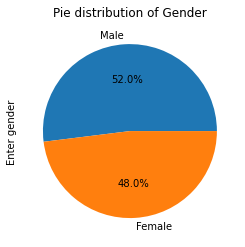

In [18]:
plt.title("Pie distribution of Gender")
corona_effects['Enter gender'].value_counts().plot.pie(autopct='%1.1f%%')

In [19]:
num_sex= pd.DataFrame(corona_effects.groupby('Enter gender')['Enter gender'].count())
num_sex

,Enter gender
Enter gender,
Female,98
Male,106


<AxesSubplot:title={'center':'Count distribution of Status'}, xlabel='You  are a-', ylabel='count'>

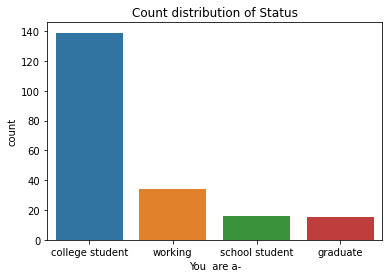

In [20]:
plt.title("Count distribution of Status")
sns.countplot(x="You  are a-", data=corona_effects, order= ['college student', 'working', 'school student', 'graduate'])

In [21]:
status_count= pd.DataFrame(corona_effects.groupby('You  are a-')['You  are a-'].count())
status_count

,You are a-
You are a-,
college student,139
graduate,15
school student,16
working,34


In [37]:
NoYes.groupby('Enter gender_Female')[['3. Are you overeating or have put on your weight?_Yes' ]].sum()
#The number of men and women who answered yes to overeating.
#0= male | 1= female
#מספר הגברים והנשים שענו כן על אכילת יתר

,3. Are you overeating or have put on your weight?_Yes
Enter gender_Female,
0,40
1,48


### **3. Correlations and Findings:**

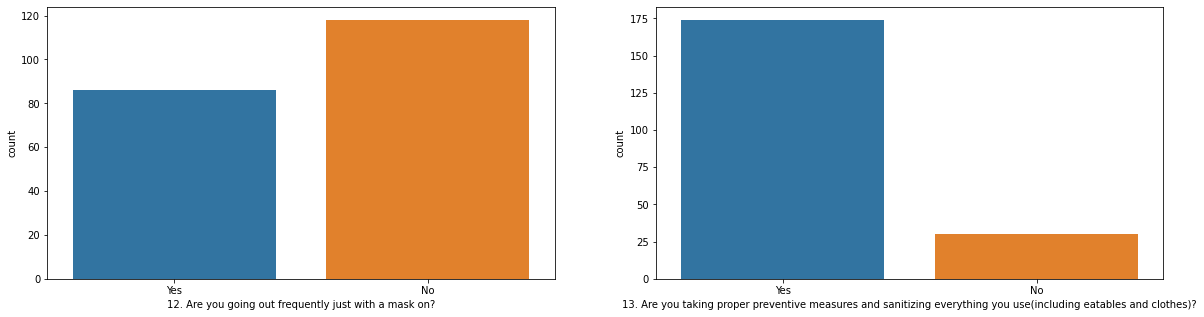

In [24]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=2)
sns.countplot(ax=axes[0], x="12. Are you going out frequently just with a mask on?", data=corona_effects)
sns.countplot(ax=axes[1], x="13. Are you taking proper preventive measures and sanitizing everything you use(including eatables and clothes)?", data=corona_effects)
plt.show()

In [25]:
NoYes.groupby('Enter gender_Female')[['12. Are you going out frequently just with a mask on?_Yes']].sum()

,12. Are you going out frequently just with a mask on?_Yes
Enter gender_Female,
0,54
1,32


In [26]:
NoYes.groupby('Enter gender_Female')[['13. Are you taking proper preventive measures and sanitizing everything you use(including eatables and clothes)?_Yes']].sum()

,13. Are you taking proper preventive measures and sanitizing everything you use(including eatables and clothes)?_Yes
Enter gender_Female,
0,87
1,87


**Findings:**

It can be seen that there is no connection between wearing a mask and hygiene against the corona.
Another thing is that most people do not wear a mask but on the other hand do maintain hygiene.

In addition, it can be seen that there is equality between women and men in hygiene, compared to what is commonly thought that women are more hygienic than men. And another thing is that men are more careful about wearing a mask than women.

אפשר לראות שאין קשר בין עטיית מסיכה לבין הגיינה נגד הקורונה.
דבר נוסף הוא שרוב האנשים אינם עוטים מסיכה אך לעומת זאת כן שומרים על הגיינה.

בנוסף, אפשר לראות כי יש שוויון בין נשים לגברים בהגיינה, לעומת מה שנהוג לחשוב כי נשים יותר הגיניות מגברים. ודבר נוסף הוא שגברים מקפידים יותר על עטיית מסיכה מאשר נשים.

In [27]:
corona_effects['Working on your skills_Yes'] = NoYes['10. Are you working on your skills and hobbies and trying to enhance them? _Yes']
corona_effects['Corona vacation_Yes']= NoYes['11. Have you kept studies aside and just enjoying this phase like a long vacation?_Yes']
corona_effects.head()

,Timestamp,Enter your name,Enter gender,You are a-,1. Average number of hours you used to sleep before covid-,2. Average number of hours you sleep now-,3. Are you overeating or have put on your weight?,"4. Number of hours you used mobile, tv, laptop or any other devices before covid-",5. Number of hours you use these devices now-,6. Do you exercise daily?,"7. Health issues like anxiety, headache, dehydration, stomach ache or any other problems have started or increased than before",8. Relations with family have improved?,9. Contact with old school friends or fellow mates have increased and social life have improved after covid,10. Are you working on your skills and hobbies and trying to enhance them?,11. Have you kept studies aside and just enjoying this phase like a long vacation?,12. Are you going out frequently just with a mask on?,13. Are you taking proper preventive measures and sanitizing everything you use(including eatables and clothes)?,14. Overall covid has changed you in which manner?,Working on your skills_Yes,Corona vacation_Yes
0,8/27/2020 20:42:45,Sourabh Karma,Male,college student,8.0,6,No,3,10.0,Yes,No,Same as before,Same as before,Yes,Yes,Yes,Yes,Positive,1,1
1,8/31/2020 13:59:59,Suyash Tabakade,Male,college student,6.0,9,No,6,10.0,Sometimes,No,Same as before,Yes,Yes,Yes,No,Yes,Negative,1,1
2,8/31/2020 14:00:32,Khushi Neema,Female,college student,7.0,9,No,6,7.0,Sometimes,Yes,yes,Yes,Yes,No,No,Yes,Positive,1,0
3,8/31/2020 14:01:17,Divyansh Verma,Male,college student,2.0,7,No,14,4.0,Yes,Same as before,no,No,Yes,No,No,Yes,Not at all changed,1,0
4,8/31/2020 14:02:47,Mayank Pandya,Male,college student,6.0,8,No,2,7.0,Sometimes,No,Same as before,Same as before,Yes,No,Yes,Yes,Negative,1,0


In [28]:
average = corona_effects.pivot_table('Working on your skills_Yes','You  are a-').sort_values(by='Working on your skills_Yes')
average

#Average between status and improving skills and hobbies
#ממוצע בין סטטוס לבין שיפור מיומנויות ותחביבים

,Working on your skills_Yes
You are a-,
school student,0.437500
working,0.647059
graduate,0.666667
college student,0.712230


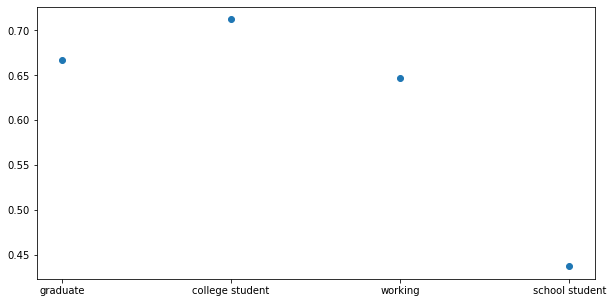

In [29]:
order = [2,3,1,0]
plt.figure(figsize=(10,5))
plt.scatter(average.index[order],average.values[order])
#plt.ylim(0,1)

#Graphic display | הצגה גרפית

In [30]:
average = corona_effects.pivot_table(['Working on your skills_Yes', 'Corona vacation_Yes'], 'You  are a-')
average

#Adding an average between status and taking Corona as a vacation
#הוספת ממוצע בין סטטוס לבין לקיחת קורונה כחופשה

,Corona vacation_Yes,Working on your skills_Yes
You are a-,,
college student,0.446043,0.712230
graduate,0.466667,0.666667
school student,0.250000,0.437500
working,0.352941,0.647059


**Findings:**

It can be seen from the graph noticeably that high school students worked the least on their skills and hobbies while at Corona from the rest, and from the second table it can be assumed that most of the time they spent studying compared to the rest who took it as a vacation, for example graduate.

ניתן לראות מהגרף בצורה ניכרת לעין כי תלמידי תיכון עבדו הכי פחות על המיומנויות והתחביבים שלהם בזמן הקורונה מהשאר, ומהטבלה השנייה ניתן להניח שאת רוב הזמן הם השקיעו בלימודים לעומת השאר שלקחו את זה כחופשה, לדוגמא מי שסיים את התואר.

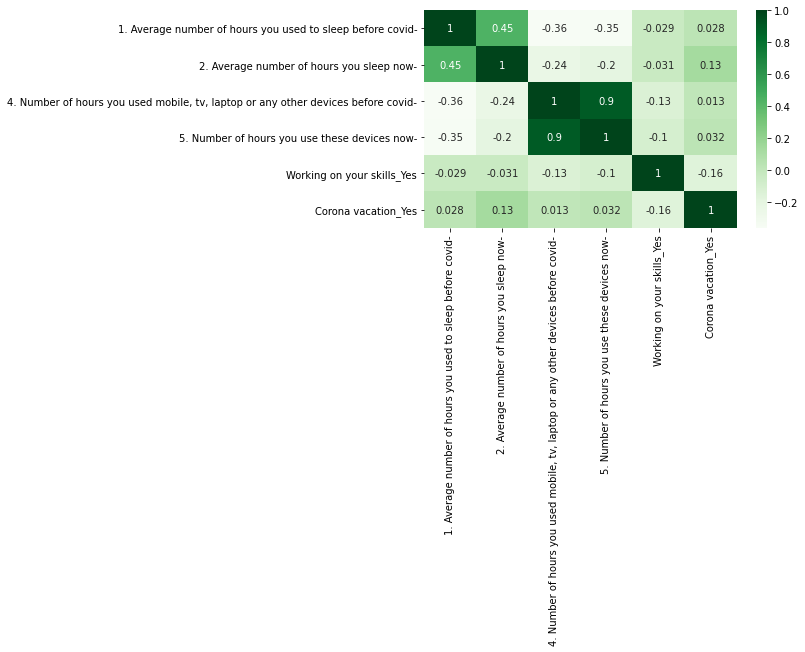

In [31]:
plt.figure(figsize=(7,4)) 
sns.heatmap(corona_effects.corr(),annot=True,cmap='Greens')
plt.show()

#We see from the correlation that the highest match is between the 2 columns of using screen time before and during the corona
#אנחנו רואים מהקורלציה שההתאמה הגבוהה ביותר היא בין 2 העמודות של שימוש בזמן מסך לפני ובמהלך הקורונה

In [41]:
corona_effects['a5'] = corona_effects['5. Number of hours you use these devices now-']
mean5 = corona_effects.a5.mean()
corona_effects['a5'] = corona_effects['a5'].replace(69.0, mean5).astype('float')
average = corona_effects.pivot_table(['4. Number of hours you used mobile, tv, laptop or any other devices before covid-', 'a5'], 'Enter gender')
average
#Mean between gender and screen time hours before the corona (column 4) and during the corona (column 5)
#ממוצע בין מגדר לשעות זמן מסך לפני הקורונה (עמודה 4) ובזמן הקורונה (עמודה 5)

#a5= עמודה 5 עם שינוי הערך 69 לממוצע העמודה

,"4. Number of hours you used mobile, tv, laptop or any other devices before covid-",a5
Enter gender,,
Female,4.581633,6.747724
Male,4.566038,7.183962


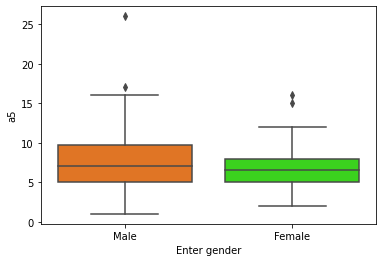

In [36]:
plt.subplot(1,1,1)
sns.boxplot(x = 'Enter gender', y = 'a5', data = corona_effects, palette="gist_ncar_r" )
plt.subplots_adjust(wspace=0.005);

**Findings:**

It can be seen that before the corona men and women watched on average those hours of screen time, and during the corona there is an effect on both men and women.
But the maximum effect is on men as can be seen in Boxplot.

ניתן לראות כי לפני הקורונה גברים ונשים צפו בממוצע באותן שעות זמן מסך, ובמהלך הקורונה קיימת השפעה על גברים ונשים כאחד. 
אך ההשפעה המירבית היא על הגברים כפי שניתן לראות בבוקספלוט.